# 经验模态分解

## 基本想法

### 简单介绍 

经验模态分解是一种新的时频分析方法，而且是一种自适应的时频局部化分析方法

- IMF与采样频率相关
- 基于数据本身变化，优于傅里叶方法，摆脱了傅里叶变换的局限性
- 缺点是模态混叠

一种非平稳信号分析方法，但是它不同于FFT，EMD适合事宜数据，基于数据本身来分解，不需要基函数

基于这样的假设：

- 认为信号由不同的IMF组合而成
- IMF同时具备线性和非线性的特点

IMF：本征模态分量，Intrinsic Mode Function

### 经验模态EMD分解方法的原理及特性

**本征模态分量**

Norden E.Huang 为了得到瞬时频率，提出本征模态分量（Intrinsic Mode Function），其必须满足下面两个条件：

1. 在整个数据序列内，极值点的个数$N_e$和过零点的个数$N_z$必须满足以下关系：

$$
(N_z-1)\leq N_e \leq (N_z+1)
$$

2. 在任一时间点，信号由局部极大值确定的上包络线和由局部极小值确定的下包络线的均值必须满足：

$$
\frac{f_{max}(t)+f_{min}(t)}{2}=0
$$

## PyEMD

- https://github.com/laszukdawid/PyEMD

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from PyEMD import EMD

In [3]:
EMD?

In [4]:
import numpy as np

In most cases, default setting are enough. Simply import `EMD` and pass your signal to `emd` method.

In [5]:
s = np.random.random(100)
emd = EMD()
IMFs = emd.emd(s)

In [6]:
IMFs.shape

(5, 100)

## EMD

Here is a complete script on how to create and plot results.

In [7]:
from PyEMD import EMD
import numpy as np
import pylab as plt

In [8]:
# Define signal
t = np.linspace(0,1,200)
s = np.cos(11*2*np.pi*t*t) + 6*t*t

In [9]:
EMD.emd?

In [10]:
# Execute EMD on signal
IMF = EMD().emd(s,t)
N = IMF.shape[0] + 1

In [11]:
IMF.shape

(2, 200)

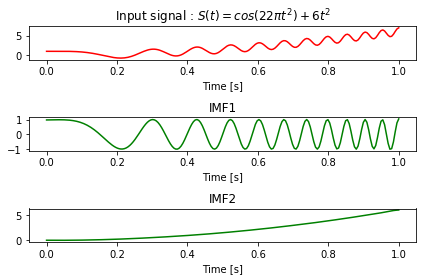

In [12]:
# Plot results
plt.subplot(N,1,1)
plt.plot(t,s,'r')
plt.title("Input signal : $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t,imf,'g')
    plt.title("IMF" + str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

可以看出该方法将原始时间序列的两个模态完全分离了出来

## EEMD

Simplest case of using Esnembled EMD (EEMD) is by importing `EEMD` and passing your signal to `eemd` method.

In [13]:
from PyEMD import EEMD
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
# Define signal
t = np.linspace(0,1,200)
sin = lambda x,p: np.sin(2*np.pi*x*t+p)
S = 3*sin(18,0.2)*(t-0.2)**2
S += 5*sin(11,2.7)
S += 3*sin(14,1.6)
S += 1*np.sin(4*2*np.pi*(t-0.8)**2)
S += t**2.1 - t

In [15]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

In [16]:
# Say we want to detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection = 'parabol'

In [17]:
# execute EEMD on S
eIMFs = eemd.eemd(S,t)
nIMFs = eIMFs.shape[0]

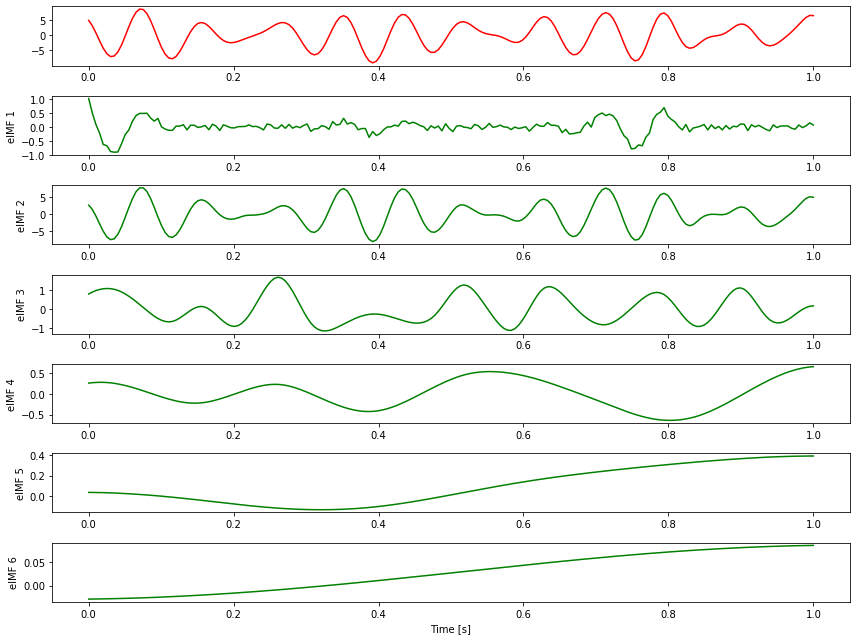

In [18]:
# plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1,1,1)
plt.plot(t,S,'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1,1,n+2)
    plt.plot(t,eIMFs[n],'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y',nbins=5)
    
plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

原始信号被分出了6个IMF，而原始信号刚好是由6个不同部分组成的，可以比较一下他们的结果

In [19]:
def get_part(t,num=0):
    if num==0:
        return 3*sin(18,0.2)*(t-0.2)**2
    elif num==1:
        return 5*sin(11,2.7)
    elif num==2:
        return 3*sin(14,1.6)
    elif num==3:
        return 1*np.sin(4*2*np.pi*(t-0.8)**2)
    elif num==4:
        return t**2.1
    elif num==5:
        return t

In [20]:
part = [get_part(t,num) for num in range(6)]

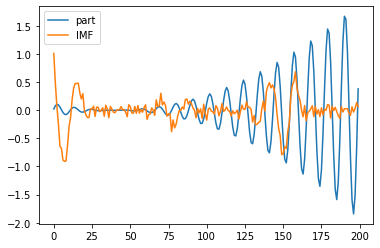

In [21]:
plt.plot(part[0],label='part')
plt.plot(eIMFs[0],label='IMF')
plt.legend()

似乎并没有完全对应上，关于本征模态分量的含义还需要进一步地进行理解